### 로지스틱 회귀 (Logistic Regression)

- 독립 변수의 선형 결합(선형 회귀)을 이용하여 이진 분류 사건의 발생 가능성을 예측하는데 사용되는 통계기법이다.

<div style="display: flex; justify-content: space-between; width: 1000px;">
    <table style="margin-left: 20px; text-align: center; border: 1px solid #eee; width: 500px;">
        <tr>
            <th>노는 시간 - 공부 시간 (x)</th>
            <th>합격 여부 (y)</th>
        </tr>
        <tr>
            <td>-4</td>
            <td>0</td>
        </tr>
        <tr>
            <td>-2</td>
            <td>0</td>
        </tr>
        <tr>
            <td>2</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>1</td>
        </tr>
    </table>  
    <div style="width: 400px">
        <img src="./images/logistic_regression_train.png">
        <br><br><br>
        <img src="./images/linear_combination.png">
    </div>
</div>  

In [1]:
import torch

X_train = torch.FloatTensor([[-4], [-2], [2], [4]])
y_train = torch.FloatTensor([[0], [0], [1], [1]])

print(X_train, y_train, sep='\n')

tensor([[-4.],
        [-2.],
        [ 2.],
        [ 4.]])
tensor([[0.],
        [0.],
        [1.],
        [1.]])


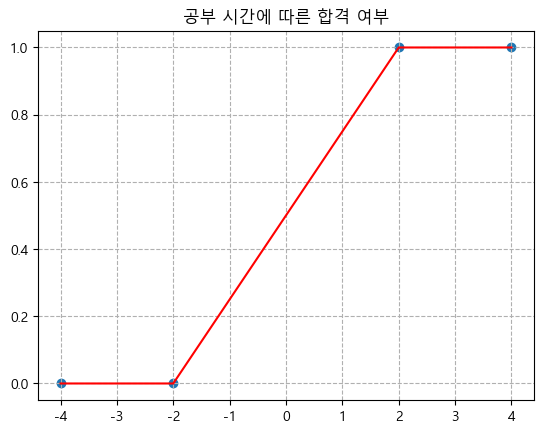

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train, color="red")
plt.grid(visible=True, linestyle='--')
plt.title('공부 시간에 따른 합격 여부')
plt.show()

- 위와 같은 데이터에 직선을 사용하게 되면, 오차가 너무 크게 생긴다.
- 기존의 가설을 S모양 그래프로 만들 수 있는 함수로 감싸주어야 하고, 이 f함수는 시그모이드 함수이다(시그모이드 함수를 가설로 사용하자).
- 따라서, 로지스틱 회귀에서는 아래와 같은 가설을 사용하게 된다.

<img src="./images/logistic_h.png" style="margin-left: 25px;">  
<img src="./images/logistic_sigmoid.png" style="margin-left: 25px;">

- 위에서 확인할 수 있듯이, W는 기울기가 아니라 경사도를 결정하게 된다. 즉, W가 커지면 경사가 높아지고 작아지면 경사가 낮아진다.
- b는 커질 수록 왼쪽으로 이동하고, 작아질 수록 오른쪽으로 이동한다.
- MSE(평균 제곱 오차) 수식을 통해 경사도와 오차에 대한 그래프를 그리고 미분을 진행하면 다음과 같다.

<img src="./images/regression_loss_function01.png" style="margin-left: 20px;">
<img src="./images/sigmoid_gradient_descent01.png" style="margin-left: 20px;">

- 경사 하강법을 통해 오차가 최소로 되는 곳에 도착해도 해당 부분이 최소가 아닐 수 있기 때문에(로컬 미니엄),  
  실제 최소가 되는 곳(글로벌 미니멈)까지 가야한다. 이는 많은 기술을 요하므로 다른 loss function을 고려해봐야 한다.

---

- 아래 그래프는 y = 0.5에 대칭하는 log 함수이다.

<img src="./images/sigmoid_gradient_descent02.png" style="margin-left: 20px;">

- 실제값이 0일 때 예측값이 1에 가까워지면 loss가 점점 커지고, 실제값이 1일 때 예측값이 0에 수렴해도 loss가 점점 커진다.
- 위 로그 함수를 수식으로 나타내면 다음과 같다.

<img src="./images/sigmoid_gradient_descent03.png" style="margin-left: 20px;">

- 위 식을 통해 W에 대한 loss function을 구하는 식은 아래와 같다.

<img src="./images/sigmoid_gradient_descent04.png" style="margin-left: 20px;">

- 실제값 y와 예측값 H(x)의 차이가 커질 수록 loss 값이 커지고 차이가 작아지면 loss 값이 작아진다.  
  위의 loss function에 대해서 경사 하강법을 수행하며 죄적의 경사도(W)를 찾아간다.

<img src="./images/sigmoid_gradient_descent05.png" style="margin-left: 20px;">

In [ ]:
import torch
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy 
# binary_cross_entropy: 이진분류, cross_entropy: 다중분류

X_train = torch.FloatTensor([[-4], [-2], [2], [4]])
y_train = torch.FloatTensor([[0], [0], [1], [1]])

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.01)

epochs = 1000

for epoch in range(1, epochs + 1):
    # 가설설정 (선형 결합)
    # H = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))
    H = torch.sigmoid(X_train.matmul(W) + b)

    # 손실 함수
    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    # 가설과 예측값 넣어주기
    loss = binary_cross_entropy(H, y_train)

    # 기울기 초기화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{}')

In [ ]:
H >= 0.5

# 0.5를 기준으로 밑에 있냐 위에 있냐의 확률값
# 0.5 이하 탈락, 0.5 이상 합격

### 🌟 예제

In [7]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/heart.csv', low_memory=False)
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

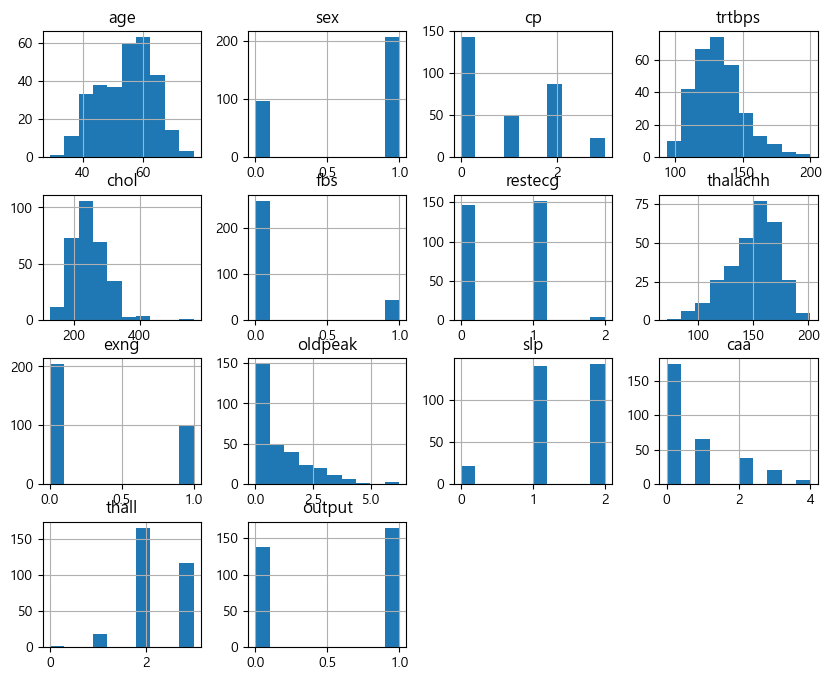

In [8]:
h_df.hist(figsize=(10, 8))

In [12]:
import torch
from torch.nn import Sequential, Linear, Sigmoid

torch.manual_seed(124)

X_train = torch.FloatTensor(h_df.iloc[:, :-1].values)
y_train = torch.FloatTensor(h_df.iloc[:, :-1].values).view(-1, 1)

logistic_r = Sequential(
    # 13개 input을 통해 결과 1개 출력
    Linear(13, 1),
    # 1 입력
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.01)

for epoch in range(1, epochs + 1):
    # 가설설정 (선형 결합)
    # 예측값
    H = logistic_r(X_train)

    # 손실 함수
    # 가설과 예측값 넣어주기
    loss = binary_cross_entropy(H, y_train)

    # 기울기 초기화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{}')

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [ ]:
(logistic_r(X_train) >= 0.5)

#### sklearn.linear_model.LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

# penalty: 규제
# l1(피처 날라감)으로 할건지 l2로 할건지 결정하면 됨

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.